<a href="https://colab.research.google.com/github/Marouane-Elgoumiri/CodeAlpha_task1/blob/main/CodeAlpha_task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 1: Titanic Classification Project Documentation
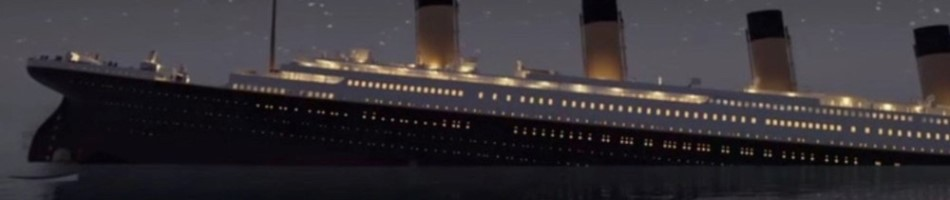
## Problem Statement
The goal of this project is to predict whether a passenger survived the Titanic sinking based on various features. This is a binary classification task, and the features include socio-economic status, age, gender, and more.

In [ ]:
!pip install pandas scikit-learn seaborn
!pip install matplotlib-venn



---


## Data Source
The dataset was obtained from *Kaggle* and includes information about Titanic passengers.


We'll be using the `RandomForest` Classifier as our model

In [ ]:


import pandas as pd
import seaborn as sns
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

drive.mount('/content/drive')
train_data = pd.read_csv('/content/drive/MyDrive/CodeAlpha/Task1/train.csv')
test_data = pd.read_csv('/content/drive/MyDrive/CodeAlpha/Task1/test.csv')




Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
print(train_data.head(20))

    PassengerId  Survived  Pclass  \
0             1         0       3   
1             2         1       1   
2             3         1       3   
3             4         1       1   
4             5         0       3   
5             6         0       3   
6             7         0       1   
7             8         0       3   
8             9         1       3   
9            10         1       2   
10           11         1       3   
11           12         1       1   
12           13         0       3   
13           14         0       3   
14           15         0       3   
15           16         1       2   
16           17         0       3   
17           18         1       2   
18           19         0       3   
19           20         1       3   

                                                 Name     Sex   Age  SibSp  \
0                             Braund, Mr. Owen Harris    male  22.0      1   
1   Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.



---


## 1. Data Preprocessing
- Removal of Unnecessary Columns
To simplify the dataset and focus on relevant features
- Handle missing values.
- Encode categorical variables.

In [ ]:
#Data Preprocessing: handling the missing values

train_data.drop(['Cabin', 'Ticket', 'Name', 'PassengerId'], axis=1, inplace=True)
test_data.drop(['Cabin', 'Ticket', 'Name'], axis=1, inplace=True)

#Fill the missing values in 'Age'
train_data['Age'].fillna(train_data['Age'].mean(), inplace=True)
test_data['Age'].fillna(test_data['Age'].mean(), inplace=True)
test_data['Fare'].fillna(test_data['Fare'].mean(), inplace=True)

#Converting categorial values ["Sex" & "Embarked"] into numerical ones

train_data = pd.get_dummies(train_data, columns=['Sex', 'Embarked'], drop_first=True)
test_data = pd.get_dummies(test_data, columns=['Sex', 'Embarked'], drop_first=True)

In [ ]:
print(train_data.head(20))

    Survived  Pclass        Age  SibSp  Parch     Fare  Sex_male  Embarked_Q  \
0          0       3  22.000000      1      0   7.2500         1           0   
1          1       1  38.000000      1      0  71.2833         0           0   
2          1       3  26.000000      0      0   7.9250         0           0   
3          1       1  35.000000      1      0  53.1000         0           0   
4          0       3  35.000000      0      0   8.0500         1           0   
5          0       3  29.699118      0      0   8.4583         1           1   
6          0       1  54.000000      0      0  51.8625         1           0   
7          0       3   2.000000      3      1  21.0750         1           0   
8          1       3  27.000000      0      2  11.1333         0           0   
9          1       2  14.000000      1      0  30.0708         0           0   
10         1       3   4.000000      1      1  16.7000         0           0   
11         1       1  58.000000      0  



---


## 2. Train-Test Split

### Features and Target Variable
The dataset was divided into features (X) and the target variable (y). The goal is to predict the 'Survived' column based on other features.

In [ ]:
# Train-test split
X = train_data.drop('Survived', axis=1)
y = train_data['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




---


## 3. Build and Train the Model

### Random Forest Classifier
For this classification task, a RandomForestClassifier from the scikit-learn library was chosen. The model was instantiated with 100 decision trees and a fixed random state for reproducibility:

In [ ]:
#Build and train the model

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)



---


## 3. Evaluating the Model

In [ ]:
#Evaluate the model

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.3f}")

Accuracy: 0.804




---


## 4. Visualizing the performance of the model


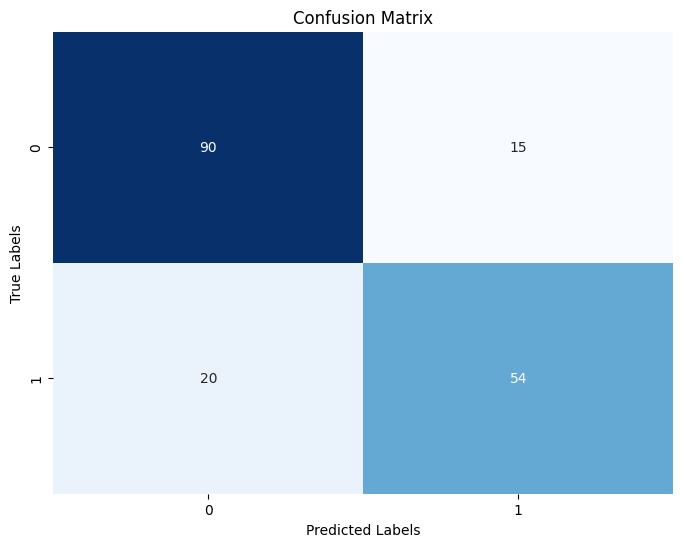

In [ ]:
#Visualizing confusion matrix through a heatmap
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
# Classification Report

print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.86      0.84       105
           1       0.78      0.73      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179



In [ ]:
#Cross validation:
from sklearn.model_selection import cross_val_score

cross_val_scores = cross_val_score(rf_classifier, X_train, y_train, cv=5)

print("Cross-Validation Scores:", cross_val_scores)
print("Mean CV Score:", cross_val_scores.mean())

Cross-Validation Scores: [0.7972028  0.75524476 0.79577465 0.76760563 0.82394366]
Mean CV Score: 0.7879542992219049


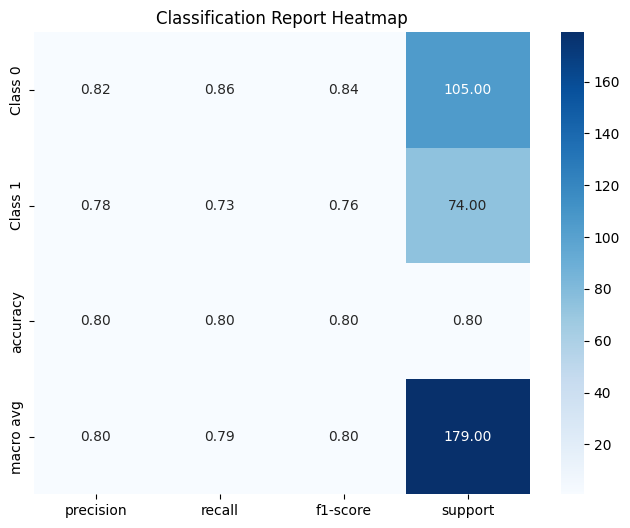

In [ ]:
#The Classification report through a heatmap

class_report = classification_report(y_test, y_pred, target_names=['Class 0', 'Class 1'], output_dict=True)
class_report_df = pd.DataFrame(class_report).T

plt.figure(figsize=(8, 6))
sns.heatmap(class_report_df.iloc[:-1, :].astype(float), annot=True, cmap='Blues', fmt=".2f")
plt.title('Classification Report Heatmap')
plt.show()

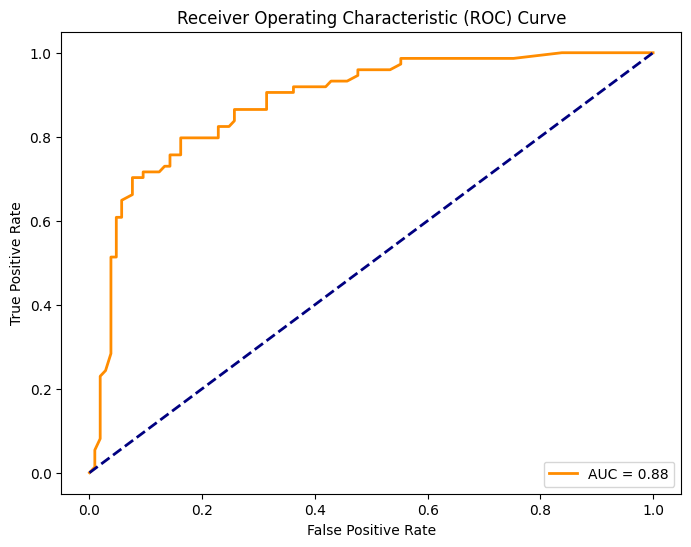

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# Get predicted probabilities
y_probs = rf_classifier.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
auc = roc_auc_score(y_test, y_probs)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()



---


## 5. Results
- Created a CSV file containing "PassengerId" and "Survived" data based on the model's predictions.

In [ ]:
#Predict on the test_data & save the predictions

missing_features = set(X.columns) - set(test_data.columns)
for feature in missing_features:
    test_data[feature] = 0

test_data = test_data[X.columns]
test_predictions = rf_classifier.predict(test_data)

test_data['Survived'] = test_predictions
test_data['PassengerId'] = test_data.index
test_data[['PassengerId', 'Survived']].to_csv('/content/drive/MyDrive/CodeAlpha/Task1/predictions.csv', index=False)